<a href="https://colab.research.google.com/github/TaeGuSeo/ML-study/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.partial_fit(train_scaled,train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)

train_score=[]
test_score=[]
classes=np.unique(train_target)

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

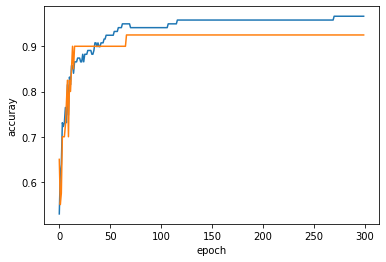

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuray')
plt.show()

In [ ]:
## max_iter의 최적값 100 도출

sgd = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sgd.fit(train_scaled,train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [ ]:
print(sgd.score(train_scaled,train_target))
print(sgd.score(test_scaled,test_target))

0.957983193277311
0.925
